<a href="https://colab.research.google.com/github/Mahyah2/ML_PROJ/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Price Prediction using Machine Learning in Python

In [ ]:
# Importing essential libraries for data manipulation and visualization
import numpy as np  # For numerical operations
import pandas as pd  # For handling datasets
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sb  # For advanced statistical visualizations

# Importing machine learning tools from scikit-learn
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling (normalization)
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.svm import SVC  # Support Vector Classifier (SVM)
from xgboost import XGBClassifier  # Extreme Gradient Boosting classifier
from sklearn import metrics  # For model evaluation (accuracy, precision, recall, etc.)

# Suppressing warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loading the dataset from a CSV file into a Pandas DataFrame
df = pd.read_csv('/content/Tesla.csv')

# Displaying the first five rows of the dataset to check its structure
df.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
# Displaying the shape of the dataset
df.shape


(1692, 7)

In [ ]:
# Generating summary statistics for numerical columns in the dataset
df.describe()


,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [ ]:
# Displaying information about the dataset, including column names, data types, and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


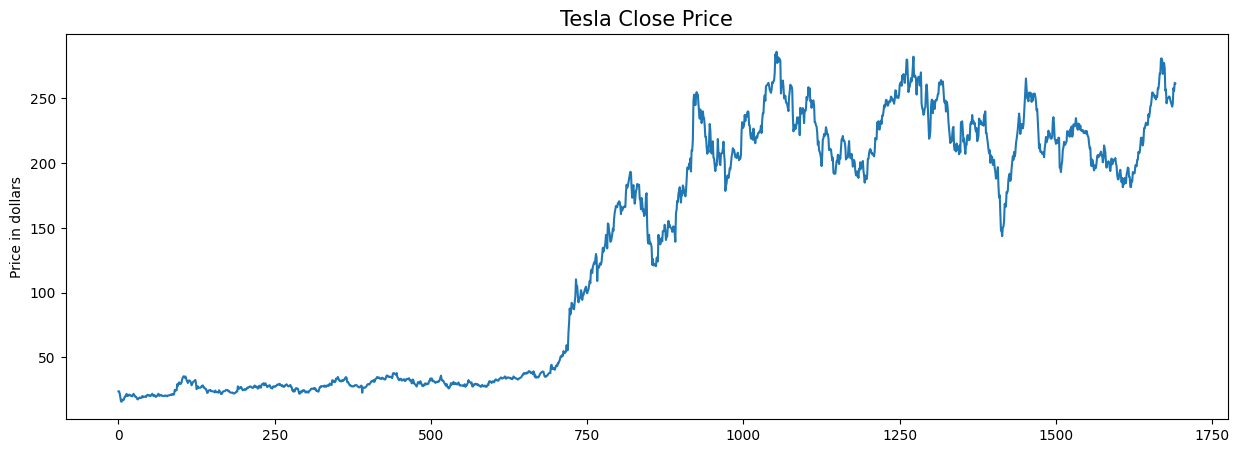

In [ ]:
# Setting the figure size for better visualization
plt.figure(figsize=(15,5))

# Plotting the 'Close' price of Tesla stock over time
plt.plot(df['Close'])

# Adding a title to the plot with a larger font size
plt.title('Tesla Close Price', fontsize=15)

# Labeling the y-axis to indicate the price in dollars
plt.ylabel('Price in dollars')

# Displaying the plot
plt.show()


In [ ]:
# Displaying the first five rows of the dataset to check its structure
df.head()

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900


In [ ]:
# Check if 'Adj Close' exists in the dataset before comparing or dropping
if 'Adj Close' in df.columns:
    # Checking if all rows have the same value in 'Close' and 'Adj Close'
    print(df[df['Close'] == df['Adj Close']].shape)

    # Dropping the 'Adj Close' column as it's redundant
    df = df.drop(['Adj Close'], axis=1)
    print("'Adj Close' column dropped successfully.")
else:
    print("Column 'Adj Close' not found in the dataset.")

# Checking for missing values in the dataset
df.isnull().sum()


(1692, 7)
'Adj Close' column dropped successfully.


,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


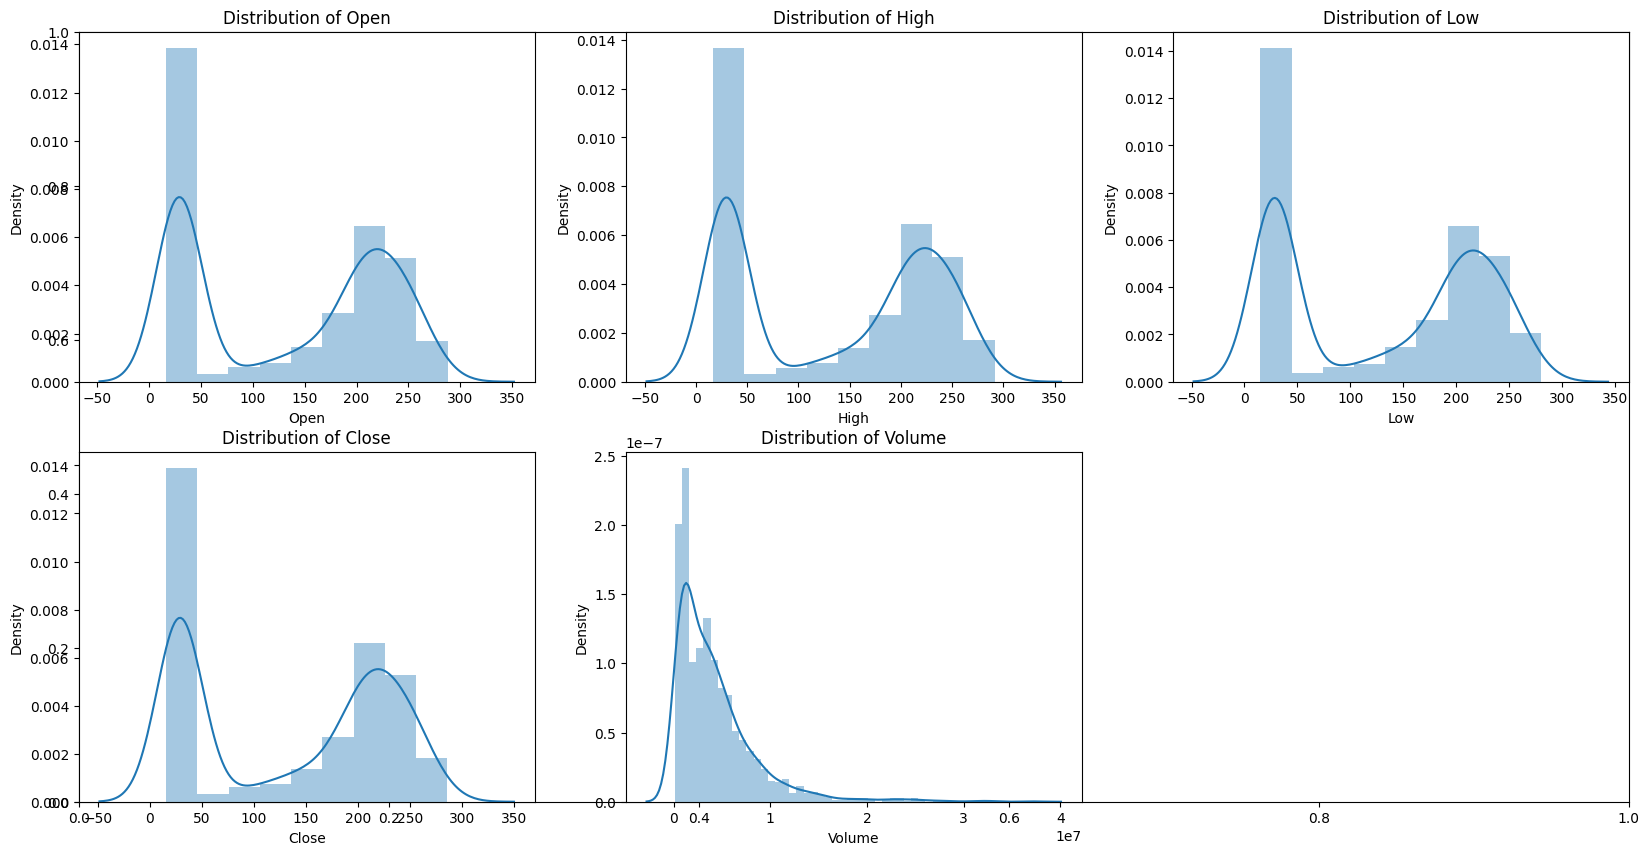

In [ ]:
# Defining the list of features for which we want to plot distribution
features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Setting the figure size for better visibility
plt.subplots(figsize=(20, 10))

# Looping through each feature to create subplots
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Creating a grid of 2 rows and 3 columns for subplots
    sb.distplot(df[col])  # Plotting the distribution of the feature using Seaborn
    plt.title(f'Distribution of {col}')  # Adding a title to each subplot

# Displaying the plots
plt.show()


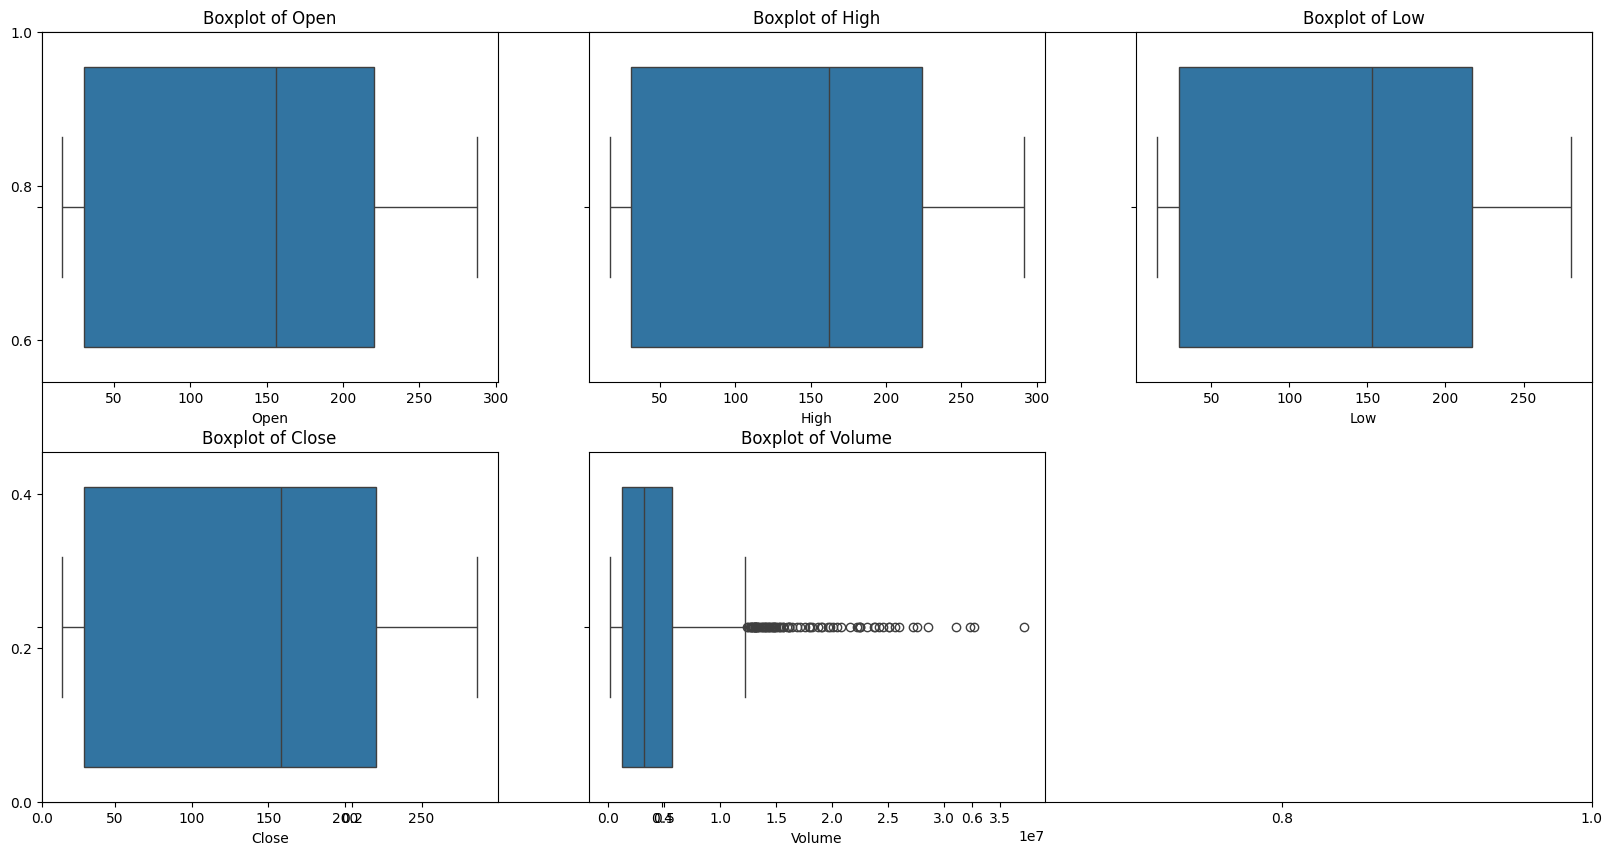

In [ ]:
# Setting the figure size for better visibility
plt.subplots(figsize=(20, 10))

# Looping through each feature to create subplots
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Creating a 2-row, 3-column grid of subplots
    sb.boxplot(x=df[col])  # Plotting the boxplot for each feature
    plt.title(f'Boxplot of {col}')  # Adding a title to each subplot

# Displaying the plots
plt.show()


In [ ]:
# Splitting the 'Date' column by '/' and expanding the result into separate columns
# This assumes the date format is 'MM/DD/YYYY'
splitted = df['Date'].str.split('/', expand=True)

# Creating a new column 'day' by extracting the second element from the split (day) and converting it to integer
df['day'] = splitted[1].astype('int')

# Creating a new column 'month' by extracting the first element from the split (month) and converting it to integer
df['month'] = splitted[0].astype('int')

# Creating a new column 'year' by extracting the third element from the split (year) and converting it to integer
df['year'] = splitted[2].astype('int')

# Displaying the first 5 rows of the updated DataFrame to verify the changes
df.head()


,Date,Open,High,Low,Close,Volume,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [ ]:
# Creating a new column 'is_quarter_end' to identify if a month is the end of a quarter
# Using np.where to apply a condition: if the month is divisible by 3, set value to 1 (True), else 0 (False)
df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)

# Displaying the first 5 rows of the updated DataFrame to verify the new column
df.head()


,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


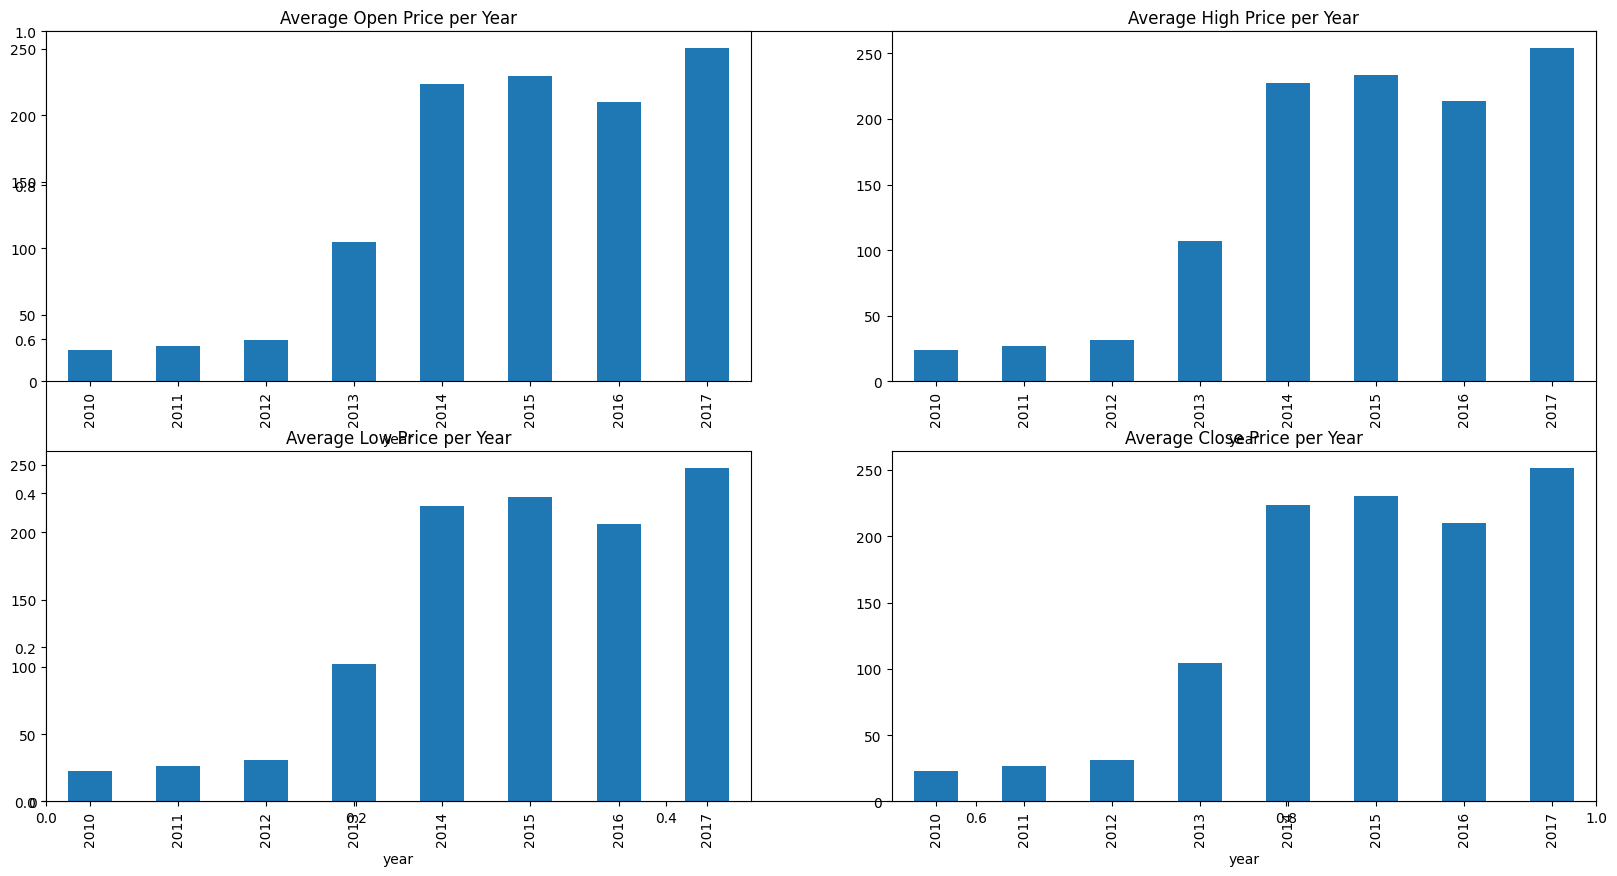

In [16]:
# Dropping the 'Date' column and grouping the data by 'year', then calculating the mean for each group
data_grouped = df.drop('Date', axis=1).groupby('year').mean()

# Creating a figure with a specified size of 20x10 inches
plt.subplots(figsize=(20, 10))

# Looping through the list of columns to plot ('Open', 'High', 'Low', 'Close')
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    # Creating a 2x2 grid of subplots and selecting the (i+1)-th subplot for each iteration
    plt.subplot(2, 2, i + 1)

    # Plotting a bar chart for the current column using the grouped data
    data_grouped[col].plot.bar()

    # Adding a title to each subplot for clarity
    plt.title(f'Average {col} Price per Year')

# Displaying all the subplots
plt.show()

# This code is modified by Susobhan Akhuli


In [17]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,15.686501,6.141208,2013.353464
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,15.657244,7.584806,2013.314488


In [18]:
# Creating a new column 'open-close' by calculating the difference between 'Open' and 'Close' prices
# This helps in understanding how much the stock price moved within the day
df['open-close'] = df['Open'] - df['Close']

# Creating a new column 'low-high' by calculating the difference between 'Low' and 'High' prices
# This indicates the volatility or price range within the day
df['low-high'] = df['Low'] - df['High']

# Creating a 'target' column to define the prediction label
# Using np.where to set target as 1 if the next day's closing price is higher than the current day's closing price, else 0
# This is often used in stock prediction tasks to identify upward trends
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


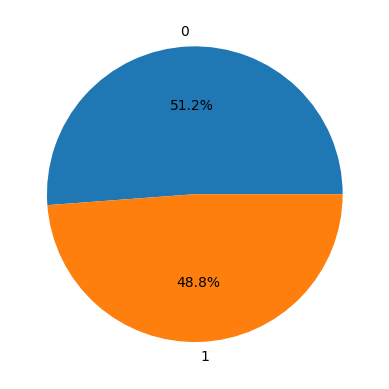

In [19]:
# Creating a pie chart to visualize the distribution of the 'target' column

# Plotting the pie chart using the value counts of the 'target' column
# 'df['target'].value_counts().values' provides the count of 0s and 1s
# 'labels=[0, 1]' assigns labels to the pie slices representing 'Down' (0) and 'Up' (1) movements
# 'autopct="%1.1f%%"' displays the percentage on each slice with one decimal place
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')

# Displaying the pie chart
plt.show()


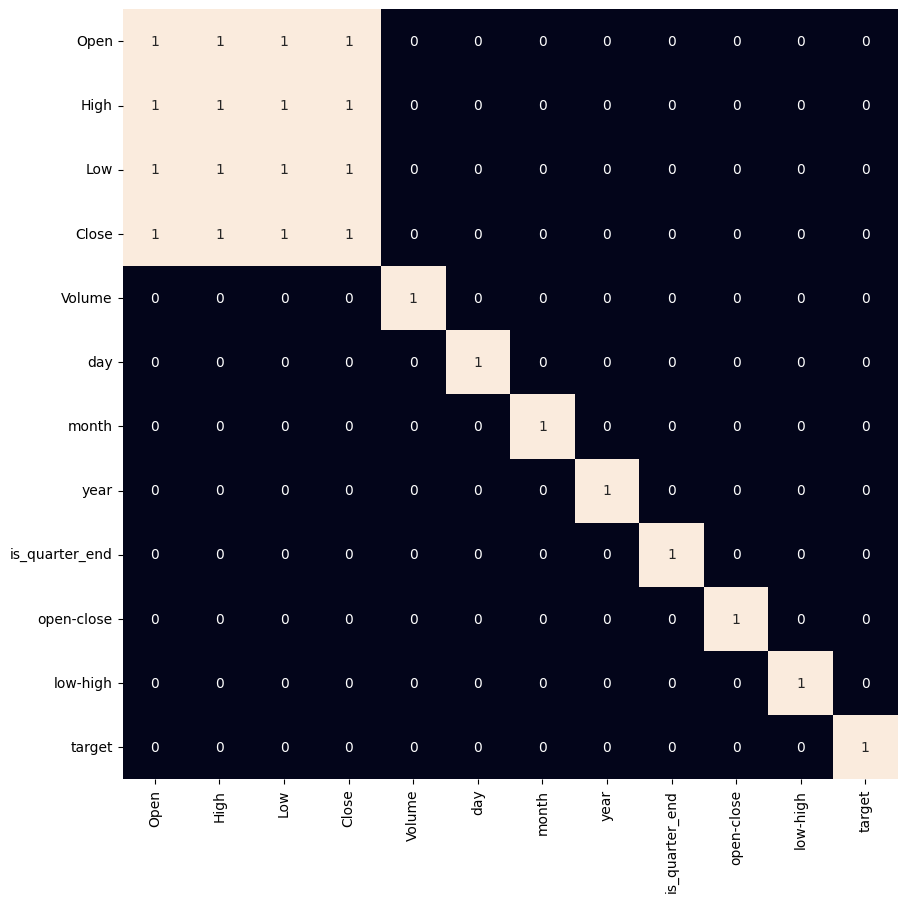

In [20]:
# Creating a figure with a specified size of 10x10 inches for the heatmap
plt.figure(figsize=(10, 10))

# Generating a heatmap to visualize highly correlated features

# 1. Dropping the 'Date' column since it's not numerical and can't be used in correlation calculations
# 2. Using .corr() to compute the pairwise correlation between numerical columns
# 3. Applying a condition (> 0.9) to highlight only strong correlations (above 0.9)
# 4. sb.heatmap() plots the correlation matrix:
#    - annot=True displays the correlation values inside the heatmap cells
#    - cbar=False removes the color bar for a cleaner look focused on the matrix
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)

# Displaying the heatmap
plt.show()

# This code is modified by Susobhan Akhuli


In [21]:
# Selecting specific features from the DataFrame for model training
# 'open-close', 'low-high', and 'is_quarter_end' are used as input features
features = df[['open-close', 'low-high', 'is_quarter_end']]

# Defining the target variable which the model will predict
target = df['target']

# Initializing the StandardScaler to normalize the feature values
# This scales the data to have a mean of 0 and standard deviation of 1
scaler = StandardScaler()

# Fitting the scaler on the features and transforming them
# This ensures all features are on the same scale, improving model performance
features = scaler.fit_transform(features)

# Splitting the dataset into training and validation sets
# - X_train, Y_train: used for model training
# - X_valid, Y_valid: used for validation/testing
# - test_size=0.1: 10% of the data is used for validation
# - random_state=2022: ensures reproducibility of the split
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)

# Printing the shapes of the training and validation feature sets
# This helps verify the split
print(X_train.shape, X_valid.shape)


(1522, 3) (170, 3)


In [22]:
# Importing necessary libraries for the models and evaluation (if not already imported)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

# Initializing three different classification models:
# 1. Logistic Regression - a linear model for binary classification
# 2. Support Vector Classifier (SVC) with polynomial kernel and probability estimates enabled
# 3. XGBoost Classifier - a powerful gradient boosting algorithm
models = [LogisticRegression(),
          SVC(kernel='poly', probability=True),
          XGBClassifier()]

# Looping through each model for training and evaluation
for i in range(3):
    # Training the current model on the training data
    models[i].fit(X_train, Y_train)

    # Printing the model's name
    print(f'{models[i]} : ')

    # Calculating and printing ROC AUC score on the training set
    # Using predict_proba() to get probability estimates for the positive class
    print('Training Accuracy : ', metrics.roc_auc_score(
        Y_train, models[i].predict_proba(X_train)[:, 1]))

    # Calculating and printing ROC AUC score on the validation set
    print('Validation Accuracy : ', metrics.roc_auc_score(
        Y_valid, models[i].predict_proba(X_valid)[:, 1]))

    # Printing an empty line for better readability
    print()


LogisticRegression() : 
Training Accuracy :  0.5191606217616581
Validation Accuracy :  0.5436730123180291

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4719481865284974
Validation Accuracy :  0.4479283314669653

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

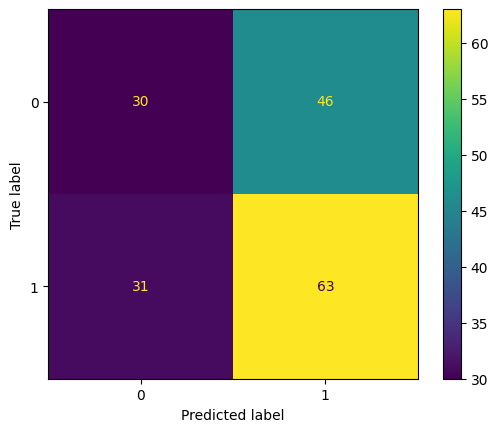

In [23]:
# Importing ConfusionMatrixDisplay for visualizing the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Generating and displaying the confusion matrix for the first model (Logistic Regression) on the validation set

# ConfusionMatrixDisplay.from_estimator:
# - Takes the trained model (models[0]) as the estimator
# - Uses X_valid and Y_valid to generate predictions and compare with true labels
# - Automatically creates the confusion matrix plot
ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)

# Displaying the confusion matrix plot
plt.show()

# This code is modified by Susobhan Akhuli
